In [81]:
import Acquire as a
import prepare as p

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = a.acquire_data()
train, validate, test = p.split(df)

In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_of_wine
3737,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,White
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,Red
2200,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,White
4139,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,White
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,Red


In [5]:
p.overview(train)

--- Shape: (3637, 13)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 3737 to 548
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3637 non-null   float64
 1   volatile acidity      3637 non-null   float64
 2   citric acid           3637 non-null   float64
 3   residual sugar        3637 non-null   float64
 4   chlorides             3637 non-null   float64
 5   free sulfur dioxide   3637 non-null   float64
 6   total sulfur dioxide  3637 non-null   float64
 7   density               3637 non-null   float64
 8   pH                    3637 non-null   float64
 9   sulphates             3637 non-null   float64
 10  alcohol               3637 non-null   float64
 11  quality               3637 non-null   int64  
 12  type_of_wine          3637 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 397.8+ KB
--- Column Descriptions
      

# Univariate analysis

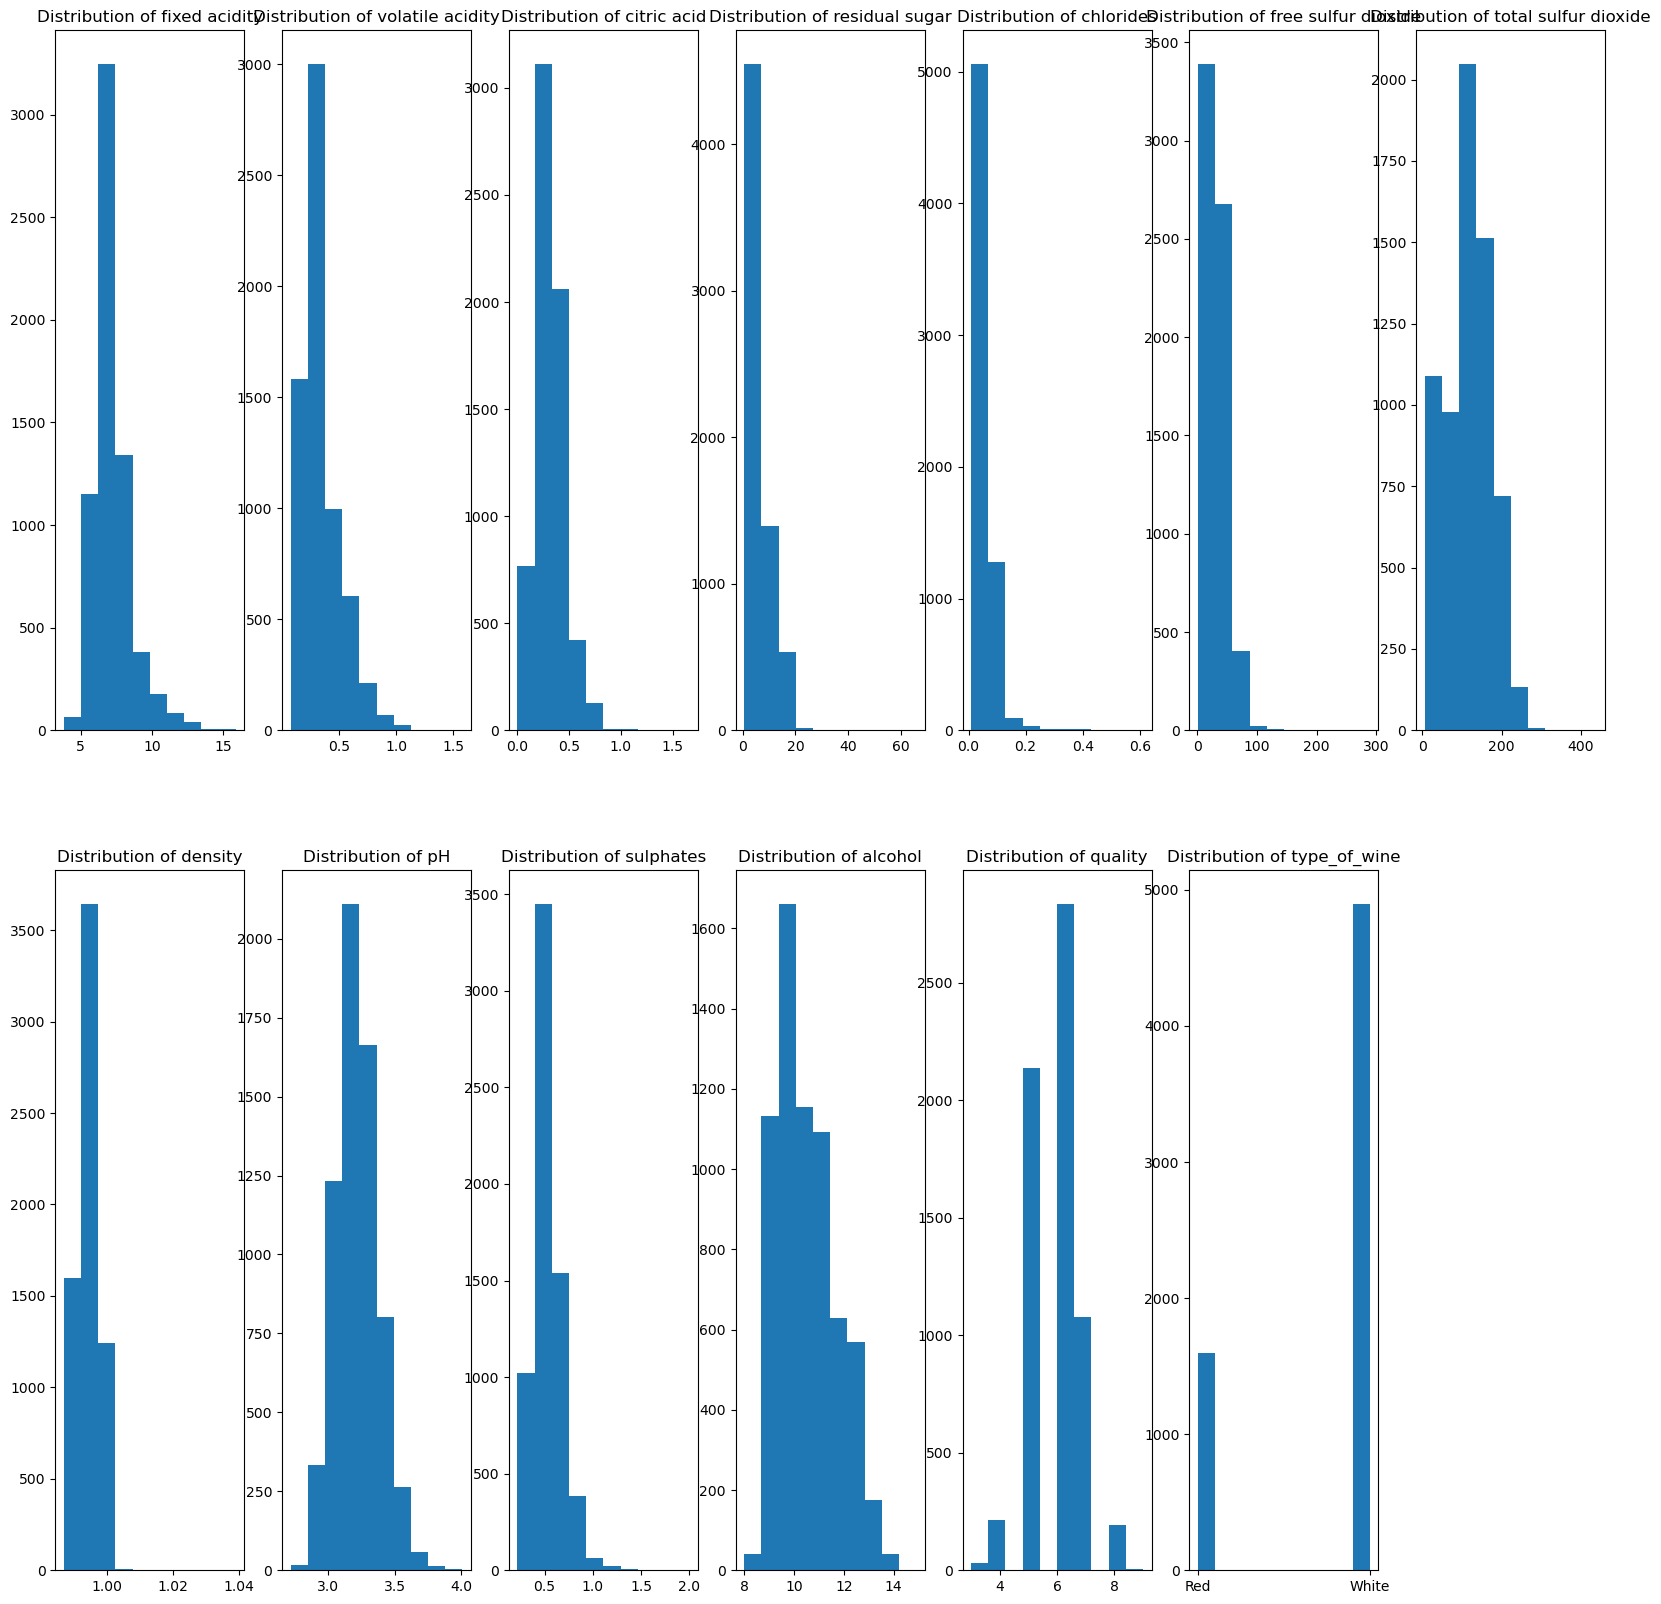

In [38]:
cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2) +1, plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
plt.show()

In [41]:
box_cols = df.drop(columns='type_of_wine').columns.to_list()

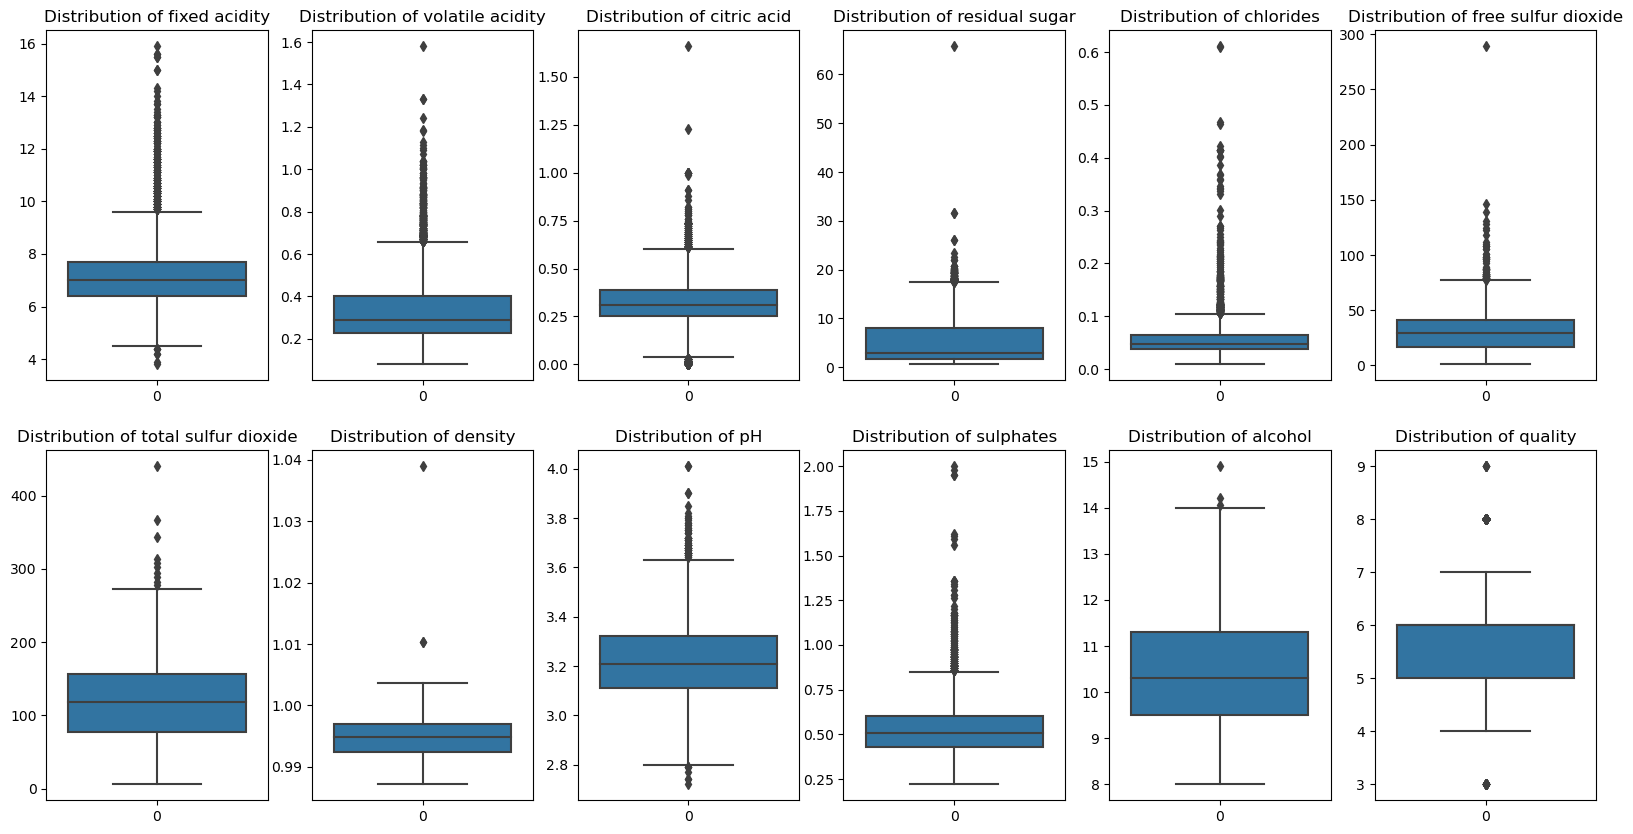

In [47]:
plt.figure(figsize=(20,10))
for i, col in enumerate(box_cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

# Bivariate analysis

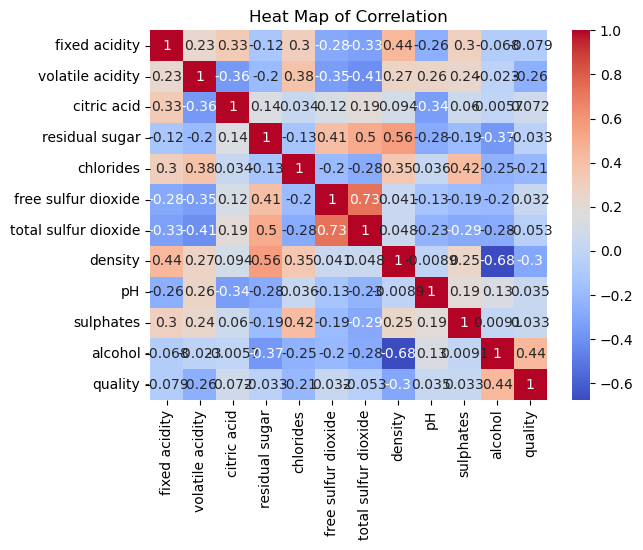

In [6]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation')
plt.show()

In [13]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

<Figure size 2000x2000 with 0 Axes>

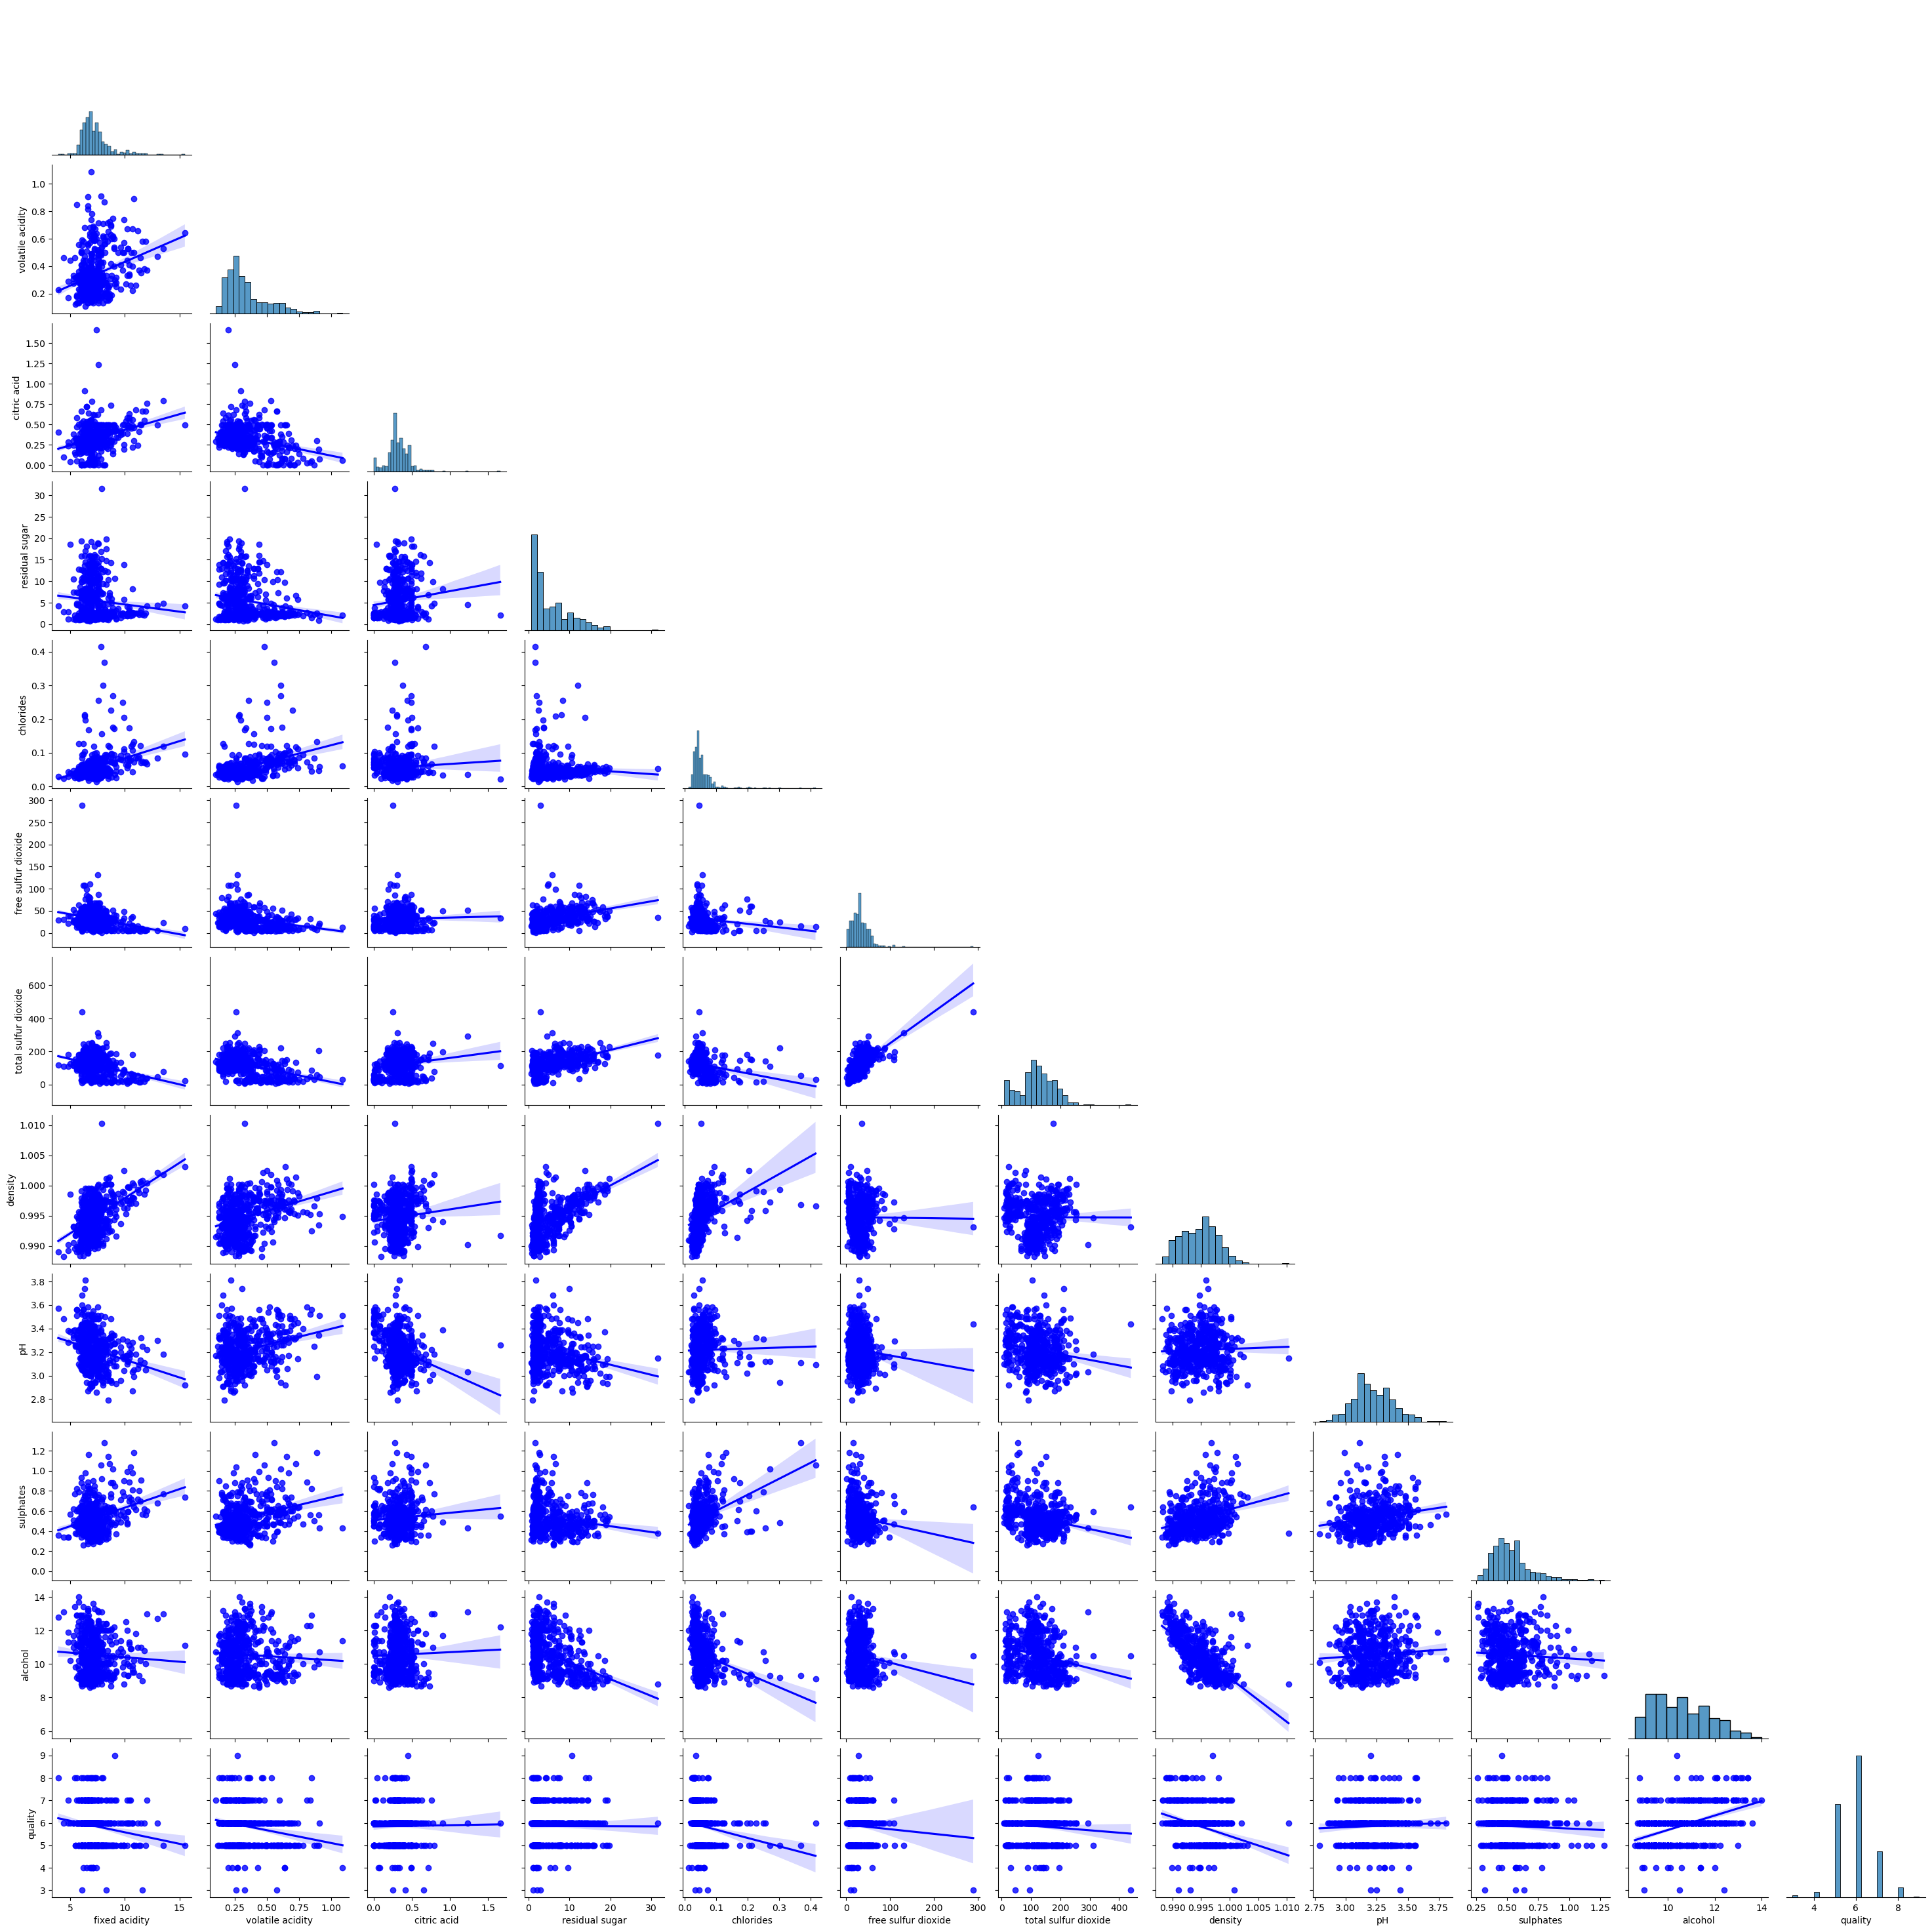

In [14]:
get_pairplot(train)

### Looks like strong correlations to quality on 'volatile acidity', 'chlorides', 'density' and 'alcohol'

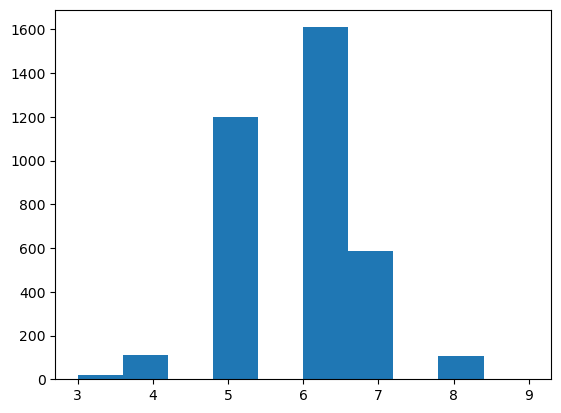

In [23]:
plt.hist(data=train, x='quality');

quality is not very normally distributed

In [97]:
def check_hypothesis(data, x, y, α=0.05, test=stats.pearsonr):
    r, p = test(data[x], data[y])
    if p < α:
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print(f"The correlation coefficient between \
{x} and {y} is {r:.2f} with a p-value of {p:.4f}")
        print('_______________________________________________________')
    else:
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

### quick check for statistically relevent correlations using pearsonsr

In [104]:
for col in df.drop(columns=['quality', 'type_of_wine']).columns.to_list():
    check_hypothesis(train, 'quality', col)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and fixed acidity are correlated.
The correlation coefficient between quality and fixed acidity is -0.08 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile acidity are correlated.
The correlation coefficient between quality and volatile acidity is -0.26 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and citric acid are correlated.
The correlation coefficient between quality and citric acid is 0.07 with a p-value of 0.0000
_______________________________________________________
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and residual sugar are correlated.
The correlatio

## Does 'volatile acidity' have a correlation with quality?

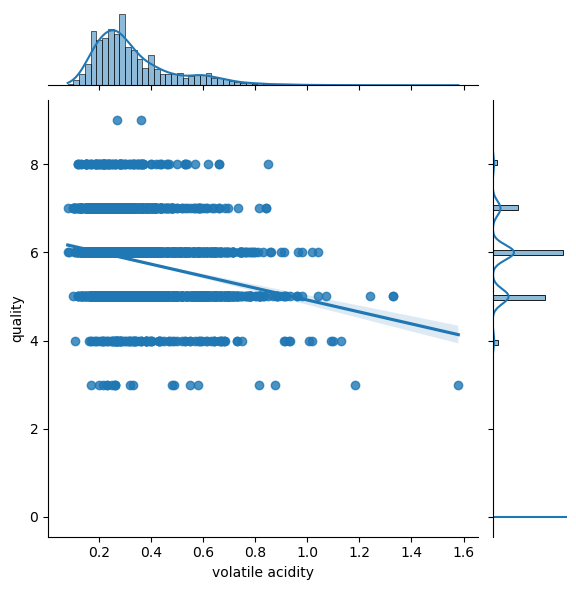

In [21]:
sns.jointplot(data=train, x='volatile acidity', y='quality', kind='reg')
plt.axhline()
plt.show()

Is there a statistial correlation?
- volatile acidity is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [76]:
# r, p = stats.spearmanr(train.quality, train['volatile acidity'])
check_hypothesis(train, 'quality', 'volatile acidity', test=stats.spearmanr)

The correlation coefficient between quality and volatile acidity is -0.25 with a p-value of 0.0000
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile acidity are correlated.
_______________________________________________________


### We are able to conclude that quality and volatile acidity are correlated, with a correlation coeficient of -.25 (as volatile acidity goes up, quality goes down).

### Do chlorides have a linear correlation to quality?

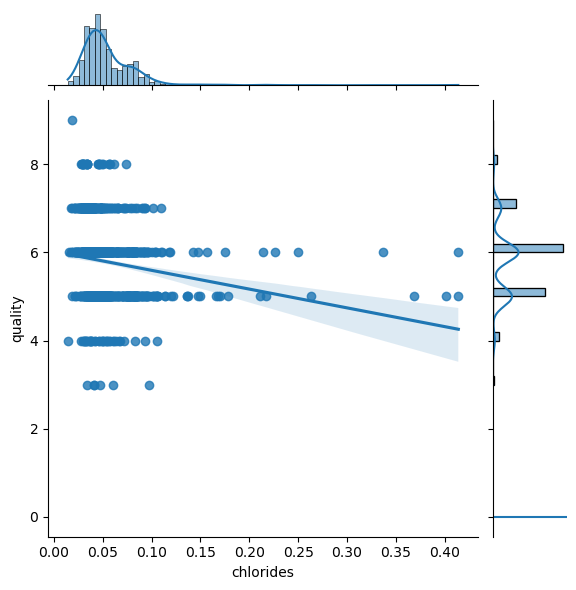

In [105]:
sns.jointplot(data=train.sample(1000), x='chlorides', y='quality', kind='reg')
plt.axhline()
plt.show()

In [106]:
check_hypothesis(train, 'quality', 'chlorides', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and chlorides are correlated.
The correlation coefficient between quality and chlorides is -0.30 with a p-value of 0.0000
_______________________________________________________


Is there a statistial correlation?
- chlorides is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05